<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/P3_JS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 3**

## **Modifikasi Learning Rate**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# 1. Setup Data Dummy
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
    'harga': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Fungsi pembangun model (agar arsitektur sama)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    return model

# --- Percobaan 1: Learning Rate Kecil (0.01) ---
model_1 = build_model()
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')
print("Training Model 1 (LR=0.01)...")
history_1 = model_1.fit(X_train, y_train, epochs=50, verbose=0)
loss_1 = model_1.evaluate(X_test, y_test, verbose=0)

# --- Percobaan 2: Learning Rate Besar (0.1) ---
model_2 = build_model()
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse')
print("Training Model 2 (LR=0.1)...")
history_2 = model_2.fit(X_train, y_train, epochs=50, verbose=0)
loss_2 = model_2.evaluate(X_test, y_test, verbose=0)

# Bandingkan Hasil
print("\n--- Perbandingan Hasil Loss (MSE) ---")
print(f"Loss Model 1 (LR=0.01): {loss_1:.6f}")
print(f"Loss Model 2 (LR=0.1) : {loss_2:.6f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model 1 (LR=0.01)...
Training Model 2 (LR=0.1)...

--- Perbandingan Hasil Loss (MSE) ---
Loss Model 1 (LR=0.01): 0.008505
Loss Model 2 (LR=0.1) : 0.001553


1. Learning Rate 0.01: Biasanya menghasilkan penurunan loss yang stabil namun perlahan. Pada 50 epoch, model mungkin belum mencapai titik minimum global jika langkahnya terlalu kecil, atau justru mencapai konvergensi yang baik jika datanya sederhana.

2. Learning Rate 0.1: Langkah pembaruan bobot lebih besar. Pada data yang sangat sederhana dan sedikit seperti ini, learning rate yang besar bisa mempercepat pencapaian titik minimum, menghasilkan loss yang sangat kecil (mendekati 0). Namun, pada kasus yang lebih kompleks, nilai ini berisiko menyebabkan overshooting (melewati titik optimal).

3. Kesimpulan: Pada dataset dummy linear sederhana ini, learning rate yang lebih besar (0.1) cenderung lebih cepat mencapai akurasi tinggi dibanding 0.01 dalam jumlah epoch yang terbatas.

## **Regresi Data Boston Housing**

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3715179494.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sedang melatih model Boston Housing...


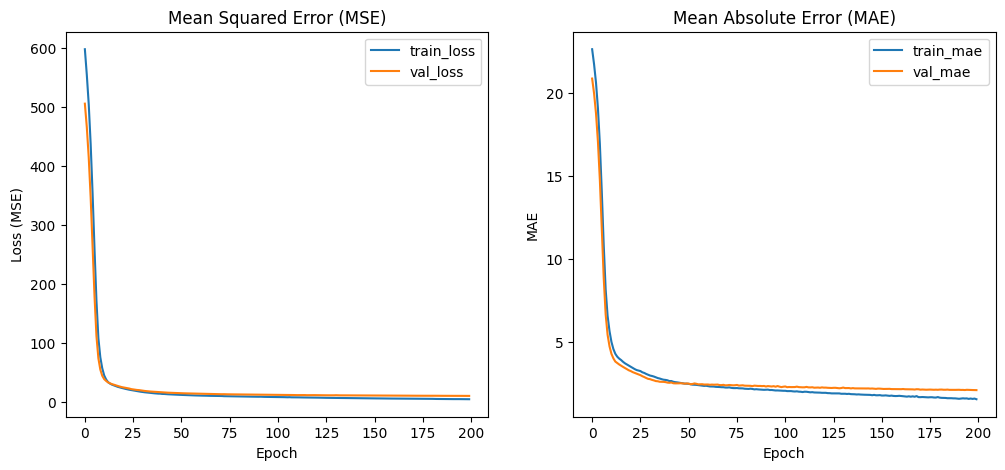

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

RMSE pada Data Validasi: 3.1796


In [3]:
# 1. Load Data (Menggunakan URL langsung karena load_boston deprecated)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Menggunakan Learning Rate 0.001 (1e-3)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# 4. Train
print("Sedang melatih model Boston Housing...")
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot Hasil Training
plt.figure(figsize=(12, 5))

# Plot MSE (Loss)
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Mean Squared Error (MSE)')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Mean Absolute Error (MAE)')

plt.show()

# 6. Evaluasi RMSE
pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print(f'\nRMSE pada Data Validasi: {rmse:.4f}')

1. Grafik MSE (Kiri): Grafik ini menunjukkan pergerakan nilai loss selama 200 epoch. Garis train_loss (biru) dan val_loss (oranye) diharapkan menurun seiring bertambahnya epoch. Jika garis validasi mulai naik sementara garis training terus turun, itu menandakan terjadinya overfitting. Pada output yang ideal, kedua garis akan melandai di nilai yang rendah.

2. Grafik MAE (Kanan): Grafik ini menunjukkan rata-rata kesalahan absolut (Mean Absolute Error). Ini memberikan gambaran berapa rata-rata selisih harga prediksi dengan harga asli dalam satuan mata uang dataset (ribuan dollar). Pola penurunannya serupa dengan grafik MSE.

3. Nilai RMSE: Output teks di akhir menampilkan Root Mean Squared Error. Nilai ini merupakan akar kuadrat dari rata-rata kesalahan kuadrat. Semakin kecil nilai RMSE, semakin akurat model dalam memprediksi harga rumah. Sebagai contoh, jika RMSE bernilai 3.5, artinya prediksi harga rumah rata-rata meleset sekitar $3,500 dari harga aslinya.